In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, Embedding,GRU

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/spam.csv",encoding = "latin1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.dropna(axis = 1,inplace = True)

In [ ]:
df.isnull().sum()


v1    0
v2    0
dtype: int64

In [ ]:
df.shape

(5572, 2)

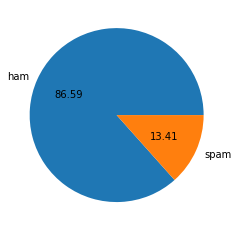

In [ ]:
plt.pie(df["v1"].value_counts(),labels = ["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
nltk.download('omw-1.4')
temp = []
for i in df["v2"]:
    token = word_tokenize(i.lower())
    
    ctoken = [x for x in token if (x.isalpha())]
    
    stop = stopwords.words("english")
    stoken = [x for x in ctoken if x not in stop]
    
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(x) for x in stoken]
    
    temp.append(" ".join(ltoken))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df["Sentence"] = temp

In [ ]:
df["Sentence"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Sentence, Length: 5572, dtype: object

In [ ]:
df["Target"] = df["v1"]

In [ ]:
df["Target"]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5572, dtype: object

In [ ]:
df.drop(["v1","v2"],axis = 1,inplace = True)

In [ ]:
df.head()

,Sentence,Target
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts may...,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham


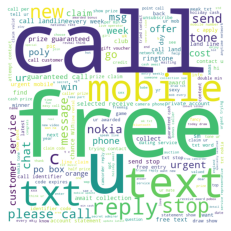

In [ ]:
wc = WordCloud(width = 800,height = 800,background_color = "white",min_font_size = 10)
wc.generate(" ".join(df[df["Target"]== "spam"]["Sentence"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

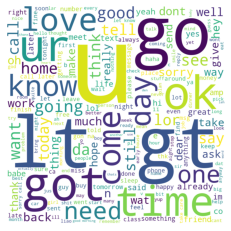

In [ ]:
wc = WordCloud(width = 800,height = 800,background_color = "white",min_font_size = 10)
wc.generate(" ".join(df[df["Target"]== "ham"]["Sentence"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
df["Target"].replace({"spam":0,"ham":1},inplace = True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = df["Sentence"]
cv = CountVectorizer(ngram_range=[1,1])
x = cv.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,df["Target"],test_size=0.25,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def models(model):
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f"train : {train}\ntest : {test}\nclassification_report :\n{classification_report(ytest,pred)}")

In [ ]:
models(MultinomialNB())

train : 0.9892318736539842
test : 0.9569274946159368
classification_report :
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       195
           1       0.98      0.97      0.97      1198

    accuracy                           0.96      1393
   macro avg       0.90      0.93      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
from sklearn.svm import SVC
models(SVC())

train : 0.9944962909787031
test : 0.9619526202440776
classification_report :
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       195
           1       0.96      1.00      0.98      1198

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
sentlen = []
for sent in df["Sentence"]:
  sentlen.append(len(word_tokenize(sent)))  # we are using the word tokenize to split the sentences in words 

df["SentLen"] = sentlen 
df.head()

,Sentence,Target,SentLen
0,go jurong point crazy available bugis n great ...,1,16
1,ok lar joking wif u oni,1,6
2,free entry wkly comp win fa cup final tkts may...,0,20
3,u dun say early hor u c already say,1,9
4,nah think go usf life around though,1,7


In [ ]:
max(sentlen)  # the review which have maximum no. of words 

73

In [ ]:
np.quantile(sentlen, 0.95) # 95% of the words in doc has len equals to 38

19.0

In [ ]:
max_len = np.quantile(sentlen, 0.95)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df["Sentence"],df["Target"],test_size=0.25,random_state=2)
tok = Tokenizer(char_level=False, split=" ")
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'u',
 2: 'call',
 3: 'get',
 4: 'ur',
 5: 'lt',
 6: 'gt',
 7: 'go',
 8: 'free',
 9: 'ok',
 10: 'know',
 11: 'like',
 12: 'time',
 13: 'come',
 14: 'good',
 15: 'got',
 16: 'day',
 17: 'text',
 18: 'want',
 19: 'love',
 20: 'send',
 21: 'txt',
 22: 'need',
 23: 'today',
 24: 'going',
 25: 'r',
 26: 'one',
 27: 'see',
 28: 'home',
 29: 'lor',
 30: 'sorry',
 31: 'n',
 32: 'back',
 33: 'still',
 34: 'c',
 35: 'take',
 36: 'mobile',
 37: 'tell',
 38: 'stop',
 39: 'later',
 40: 'phone',
 41: 'think',
 42: 'dont',
 43: 'reply',
 44: 'pls',
 45: 'da',
 46: 'week',
 47: 'new',
 48: 'hi',
 49: 'make',
 50: 'please',
 51: 'night',
 52: 'great',
 53: 'say',
 54: 'k',
 55: 'well',
 56: 'hope',
 57: 'claim',
 58: 'hey',
 59: 'oh',
 60: 'much',
 61: 'work',
 62: 'happy',
 63: 'msg',
 64: 'dear',
 65: 'friend',
 66: 'number',
 67: 'message',
 68: 'way',
 69: 'give',
 70: 'yes',
 71: 'na',
 72: 'thing',
 73: 'let',
 74: 'wat',
 75: 'yeah',
 76: 'ask',
 77: 'would',
 78: 'already',
 79: 'said',
 80:

In [ ]:
_vocab_len = len(tok.index_word)
_vocab_len

5693

In [ ]:
len(xtrain)

4179

In [ ]:
seqtrain = tok.texts_to_sequences(xtrain) #step1
seqtrain[0]

[19, 919, 19, 1, 150]

In [ ]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen= int(max_len)) #step2
seqmattrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  19, 919,  19,   1, 150], dtype=int32)

In [ ]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ...,  279,   16,  154],
       [   0,    0,    0, ..., 2438,  120, 1493],
       [   0,    0,    0, ...,   68,  274,   45],
       ...,
       [   0,    0,    0, ...,    5,    6,   88],
       [   0,    0,    0, ...,  816, 4574, 3731],
       [   0,    0,    0, ...,  568,  169,  608]], dtype=int32)

In [ ]:
_vocab_len

5693

In [ ]:
max_len

19.0

In [ ]:
rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
84/84 [==============================] - 11s 85ms/step - loss: 0.2250
Epoch 2/50
84/84 [==============================] - 5s 63ms/step - loss: 0.0290
Epoch 3/50
84/84 [==============================] - 5s 63ms/step - loss: 0.0081
Epoch 4/50
84/84 [==============================] - 5s 63ms/step - loss: 0.0032
Epoch 5/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0027
Epoch 6/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0020
Epoch 7/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0017
Epoch 8/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0017
Epoch 9/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0015
Epoch 10/50
84/84 [==============================] - 5s 62ms/step - loss: 0.0015
Epoch 11/50
84/84 [==============================] - 5s 63ms/step - loss: 0.0014
Epoch 12/50
84/84 [==============================] - 5s 63ms/step - loss: 0.0013
Epoch 13/50
84/84 [=================

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       195
           1       0.97      0.99      0.98      1198

    accuracy                           0.97      1393
   macro avg       0.97      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5


Epoch 1/50
84/84 [==============================] - 12s 84ms/step - loss: 0.2874
Epoch 2/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0376
Epoch 3/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0103
Epoch 4/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0053
Epoch 5/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0034
Epoch 6/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0023
Epoch 7/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0020
Epoch 8/50
84/84 [==============================] - 7s 82ms/step - loss: 0.0018
Epoch 9/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0017
Epoch 10/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0017
Epoch 11/50
84/84 [==============================] - 7s 84ms/step - loss: 0.0016
Epoch 12/50
84/84 [==============================] - 7s 83ms/step - loss: 0.0015
Epoch 13/50
84/84 [=================

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       195
           1       0.97      0.99      0.98      1198

    accuracy                           0.97      1393
   macro avg       0.95      0.92      0.93      1393
weighted avg       0.97      0.97      0.97      1393



In [ ]:
rnn = Sequential()

rnn.add(Embedding(_vocab_len+1,700, input_length=int(max_len), mask_zero=True))

rnn.add(GRU(units=32, activation="tanh"))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=1, activation="sigmoid"))

rnn.compile(optimizer="adam", loss="binary_crossentropy")

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=50)

ypred = rnn.predict(seqmattest)

ypred = ypred>0.5

Epoch 1/50
84/84 [==============================] - 12s 78ms/step - loss: 0.2998
Epoch 2/50
84/84 [==============================] - 8s 90ms/step - loss: 0.0415
Epoch 3/50
84/84 [==============================] - 7s 78ms/step - loss: 0.0095
Epoch 4/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0042
Epoch 5/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0026
Epoch 6/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0020
Epoch 7/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0019
Epoch 8/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0018
Epoch 9/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0017
Epoch 10/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0017
Epoch 11/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0016
Epoch 12/50
84/84 [==============================] - 6s 77ms/step - loss: 0.0016
Epoch 13/50
84/84 [=================

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))